In [1]:
!pip install torch torchvision torchaudio

In [2]:
import torchaudio
import torch
import json
import os
# import librosa
from scipy.io import wavfile
import random
import sklearn
random.seed(10)

rates = [0.9,1.1]

In [3]:
mapping_vocab = {}

with open('phone_map','r') as file:
    for i in file:
        splits=i.split(':')
        mapping_vocab[splits[0].strip()]=splits[1].strip()
        
mapping_vocab['']='_'

In [4]:
mapping_vocab

{'sil': 'sil',
 'aa': 'aa',
 'ae': 'ae',
 'ah': 'ah',
 'ao': 'aa',
 'aw': 'aw',
 'ax': 'ah',
 'ax-h': 'ah',
 'axr': 'er',
 'ay': 'ay',
 'b': 'b',
 'bcl': 'sil',
 'ch': 'ch',
 'd': 'd',
 'dcl': 'sil',
 'dh': 'dh',
 'dx': 'dx',
 'eh': 'eh',
 'el': 'l',
 'em': 'm',
 'en': 'n',
 'eng': 'ng',
 'epi': 'sil',
 'er': 'er',
 'ey': 'ey',
 'f': 'f',
 'g': 'g',
 'gcl': 'sil',
 'h#': 'sil',
 'hh': 'hh',
 'hv': 'hh',
 'ih': 'ih',
 'ix': 'ih',
 'iy': 'iy',
 'jh': 'jh',
 'k': 'k',
 'kcl': 'sil',
 'l': 'l',
 'm': 'm',
 'ng': 'ng',
 'n': 'n',
 'nx': 'n',
 'ow': 'ow',
 'oy': 'oy',
 'p': 'p',
 'pau': 'sil',
 'pcl': 'sil',
 'q': '',
 'r': 'r',
 's': 's',
 'sh': 'sh',
 't': 't',
 'tcl': 'sil',
 'th': 'th',
 'uh': 'uh',
 'uw': 'uw',
 'ux': 'uw',
 'v': 'v',
 'w': 'w',
 'y': 'y',
 'z': 'z',
 'zh': 'sh',
 '': '_'}

In [16]:
DATA_PREFIX = 'D:/SR_dataset/'

with open('train_fbank_aug.json') as f:

    train_json = json.load(f)

# for i in train_json: 
    # print(i,train_json[i])
for i in train_json:
    splits = train_json[i]['fbank'].split('/')
#     print(splits)
    split_index = splits.index('data')
    splits = splits[split_index:]
    new_file = DATA_PREFIX + '/'.join(splits)
    train_json[i]['fbank'] = new_file
    print(train_json[i]['fbank'])
    
with open('train_fbank_aug.json', 'w') as outfile:
    json.dump(train_json, outfile)    
       


D:/SR_dataset/data/fbank/train/DR1/FVFB0/SX312.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR1/FVFB0/SX312.WAV.pt
D:/SR_dataset/data/fbank/train/DR1/FVFB0/SX222.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR1/FVFB0/SX222.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR1/FVFB0/SX42.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR1/FVFB0/SX42.WAV.pt
D:/SR_dataset/data/fbank/train/DR1/FVFB0/SI1032.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR1/FVFB0/SI1032.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR1/FVFB0/SI1510.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR1/FVFB0/SI1510.WAV.pt
D:/SR_dataset/data/fbank/train/DR1/FVFB0/SI2292.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR1/FVFB0/SI2292.WAV.pt
D:/SR_dataset/data/fbank/train/DR1/FVFB0/SX402.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR1/FVFB0/SX402.WAV.pt
D:/SR_dataset/data/fbank/train/DR1/FVFB0/SX132.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR1/FVFB0/SX132.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR1/MKLW0/SX41.WAV.wav.pt
D:/SR_dataset/data/

D:/SR_dataset/data/fbank_aug/train/DR3/MILB0/SX363.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR3/MILB0/SI807.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR3/MILB0/SI807.WAV.pt
D:/SR_dataset/data/fbank/train/DR3/MTKP0/SX33.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR3/MTKP0/SX33.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR3/MTKP0/SX303.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR3/MTKP0/SX303.WAV.pt
D:/SR_dataset/data/fbank/train/DR3/MTKP0/SI454.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR3/MTKP0/SI454.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR3/MTKP0/SI1023.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR3/MTKP0/SI1023.WAV.pt
D:/SR_dataset/data/fbank/train/DR3/MTKP0/SX393.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR3/MTKP0/SX393.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR3/MTKP0/SX123.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR3/MTKP0/SX123.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR3/MTKP0/SI2283.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR3/MTKP0/SI2283.WAV.pt
D:/SR_da

D:/SR_dataset/data/fbank/train/DR7/MKAG0/SX79.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR7/MKAG0/SX79.WAV.pt
D:/SR_dataset/data/fbank/train/DR7/MRMH0/SX391.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR7/MRMH0/SX391.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR7/MRMH0/SI1349.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR7/MRMH0/SI1349.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR7/MRMH0/SX211.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR7/MRMH0/SX211.WAV.pt
D:/SR_dataset/data/fbank/train/DR7/MRMH0/SX301.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR7/MRMH0/SX301.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR7/MRMH0/SX121.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR7/MRMH0/SX121.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR7/MRMH0/SI2281.WAV.wav.pt
D:/SR_dataset/data/fbank_aug/train/DR7/MRMH0/SI2281.WAV.wav.pt
D:/SR_dataset/data/fbank/train/DR7/MRMH0/SI1021.WAV.pt
D:/SR_dataset/data/fbank_aug/train/DR7/MRMH0/SI1021.WAV.pt
D:/SR_dataset/data/fbank/train/DR7/MRMH0/SX31.WAV.wav.pt
D:/

In [17]:
# str(torchaudio.get_audio_backend())
# # torchaudio.set_audio_backend("sox")


In [18]:
# train_fbank_aug_json={}

# import wave

# for i in train_json:
#     train_fbank_aug_json[i]={}
#     location = train_json[i]['wav']
#     train_fbank_aug_json[i]['spk_id']=train_json[i]['spk_id']
#     train_fbank_aug_json[i]['duration']=train_json[i]['duration']
    
#     phns = train_json[i]['phn']
    
# #     print(phns)
# #     t=input()
#     phns = phns.split()
#     for j in range(len(phns)):
#         phns[j] = mapping_vocab[phns[j]]
#     phns = ' '.join(phns)
# #     print(phns)
# #     t=input()
#     train_fbank_aug_json[i]['phn']=phns
#     splits = location.split('/')
#     split_index = splits.index('TRAIN')
#     splits2 = splits[split_index+1:-1]
#     new_location = DATA_PREFIX + 'data/fbank/train/' + '/'.join(splits2)
#     os.makedirs(new_location,exist_ok=True)
# #     print(location)
# #     t=input()
#     waveform,sample_rate = torchaudio.load(location)
# #     t=input()
#     fbank = torchaudio.compliance.kaldi.fbank(waveform,sample_rate)
# #     print(fbank.shape)
# #     print(new_location+'/'+splits[-1]+'.pt')
# #     t=input()
#     pt_loc = new_location+'/'+splits[-1]+'.pt'
#     train_fbank_aug_json[i]['fbank'] = pt_loc
#     torch.save(fbank,pt_loc)
    
    
#     new_location = DATA_PREFIX + 'data/fbank_aug/train/' + '/'.join(splits2)
#     os.makedirs(new_location,exist_ok=True)
#     pt_loc = new_location+'/'+splits[-1]+'.pt'
#     rate = random.choice(rates)
    
#     new_id = i+'_aug'
    
#     effects = [
#         ["speed",f"{rate}"],
#         ["rate",f"{sample_rate}"]
#     ]
    
    
#     waveform,sample_rate = torchaudio.load(location)
#     waveform2,sample_rate2=torchaudio.sox_effects.apply_effects_tensor(waveform,sample_rate,effects) 
#     fbank2 = torchaudio.compliance.kaldi.fbank(waveform2,sample_rate2)
    
    
#     new_duration = float(train_json[i]['duration'])/rate
    
#     train_fbank_aug_json[new_id]['duration'] = new_duration
#     train_fbank_aug_json[new_id]['phn']=phns
#     train_fbank_aug_json[new_id]['fbank']=fbank2
#     train_fbank_aug_json[new_id]['spk_id']=train_json[i]['spk_id']
#     torch.save(fbank2,pt_loc)

    
# with open('train_fbank_aug.json', 'w') as outfile:
#     json.dump(train_fbank_aug_json, outfile)    
    

    

In [19]:
# DATA_PREFIX = 'D:/SR_dataset/'

# with open('dev.json') as f:

#     dev_json = json.load(f)

# # for i in train_json: 
#     # print(i,train_json[i])
# for i in dev_json:
#     splits = dev_json[i]['wav'].split('/')
# #     print(splits)
#     split_index = splits.index('data')
#     splits = splits[split_index:]
#     new_file = DATA_PREFIX + '/'.join(splits)
#     dev_json[i]['wav'] = new_file
#     print(dev_json[i]['wav'])

In [20]:
# dev_json

In [21]:
# dev_fbank_aug_json={}

# import wave

# for i in dev_json:
#     dev_fbank_aug_json[i]={}
#     location = dev_json[i]['wav']
#     dev_fbank_aug_json[i]['spk_id']=dev_json[i]['spk_id']
#     dev_fbank_aug_json[i]['duration']=dev_json[i]['duration']

#     phns = dev_json[i]['phn']
    
# #     print(phns)
# #     t=input()
#     phns = phns.split()
    
#     for j in range(len(phns)):
#         phns[j] = mapping_vocab[phns[j]]
#     phns = ' '.join(phns)
# #     print(phns)
# #     t=input()
#     dev_fbank_aug_json[i]['phn']=phns
    
#     splits = location.split('/')
#     split_index = splits.index('TEST')
#     splits2 = splits[split_index+1:-1]
#     new_location = DATA_PREFIX + 'data/fbank/dev/' + '/'.join(splits2)
#     os.makedirs(new_location,exist_ok=True)
# #     print(location)
# #     t=input()
#     waveform,sample_rate = torchaudio.load(location)
# #     t=input()
#     fbank = torchaudio.compliance.kaldi.fbank(waveform,sample_rate)
# #     print(new_location+'/'+splits[-1]+'.pt')
# #     t=input()
#     pt_loc = new_location+'/'+splits[-1]+'.pt'
#     dev_fbank_aug_json[i]['fbank'] = pt_loc
#     torch.save(fbank,pt_loc)
    
#     new_location = DATA_PREFIX + 'data/fbank_aug/train/' + '/'.join(splits2)
#     os.makedirs(new_location,exist_ok=True)
#     pt_loc = new_location+'/'+splits[-1]+'.pt'
#     rate = random.choice(rates)
    
#     new_id = i+'_aug'
    
#     effects = [
#         ["speed",f"{rate}"],
#         ["rate",f"{sample_rate}"]
#     ]
    
    
#     waveform,sample_rate = torchaudio.load(location)
#     waveform2,sample_rate2=torchaudio.sox_effects.apply_effects_tensor(waveform,sample_rate1,effects) 
#     fbank2 = torchaudio.compliance.kaldi.fbank(waveform2,sample_rate2)
    
    
#     new_duration = float(dev_json[i]['duration'])/rate
    
#     dev_fbank_aug_json[new_id]['duration'] = new_duration
#     dev_fbank_aug_json[new_id]['phn']=phns
#     dev_fbank_aug_json[new_id]['fbank']=fbank2
#     dev_fbank_aug_json[new_id]['spk_id']=dev_json[i]['spk_id']
#     torch.save(fbank2,pt_loc)
    
    

    
# with open('dev_fbank_aug.json', 'w') as outfile:
#     json.dump(dev_fbank_aug_json, outfile)    
    

    

In [22]:

# DATA_PREFIX = 'D:/SR_dataset/'

# with open('test.json') as f:

#     test_json = json.load(f)

# # for i in test_json: 
#     # print(i,test_json[i])
# for i in test_json:
#     splits = test_json[i]['wav'].split('/')
# #     print(splits)
#     split_index = splits.index('data')
#     splits = splits[split_index:]
#     new_file = DATA_PREFIX + '/'.join(splits)
#     test_json[i]['wav'] = new_file
#     print(test_json[i]['wav'])



# test_fbank_aug_json={}

# import wave

# for i in test_json:
#     test_fbank_aug_json[i]={}
#     location = test_json[i]['wav']
#     test_fbank_aug_json[i]['spk_id']=test_json[i]['spk_id']
#     test_fbank_aug_json[i]['duration']=test_json[i]['duration']
#     phns = test_json[i]['phn']
    
# #     print(phns)
# #     t=input()
#     phns = phns.split()
    
#     for j in range(len(phns)):
#         phns[j] = mapping_vocab[phns[j]]
#     phns = ' '.join(phns)
# #     print(phns)
# #     t=input()
#     test_fbank_aug_json[i]['phn']=phns
#     splits = location.split('/')
#     split_index = splits.index('TEST')
#     splits2 = splits[split_index+1:-1]
#     new_location = DATA_PREFIX + 'data/fbank/test/' + '/'.join(splits2)
#     os.makedirs(new_location,exist_ok=True)
# #     print(location)
# #     t=input()
#     waveform,sample_rate = torchaudio.load(location)
# #     t=input()
#     fbank = torchaudio.compliance.kaldi.fbank(waveform,sample_rate)
# #     print(fbank.shape)
# #     print(new_location+'/'+splits[-1]+'.pt')
# #     t=input()
#     pt_loc = new_location+'/'+splits[-1]+'.pt'
#     test_fbank_aug_json[i]['fbank'] = pt_loc
#     torch.save(fbank,pt_loc)
    
    
#     new_location = DATA_PREFIX + 'data/fbank_aug/test/' + '/'.join(splits2)
#     os.makedirs(new_location,exist_ok=True)
#     pt_loc = new_location+'/'+splits[-1]+'.pt'
#     rate = random.choice(rates)
    
#     new_id = i+'_aug'
    
#     effects = [
#         ["speed",f"{rate}"],
#         ["rate",f"{sample_rate}"]
#     ]
    
    
#     waveform,sample_rate = torchaudio.load(location)
#     waveform2,sample_rate2=torchaudio.sox_effects.apply_effects_tensor(waveform,sample_rate1,effects) 
#     fbank2 = torchaudio.compliance.kaldi.fbank(waveform2,sample_rate2)
    
    
#     new_duration = float(test_json[i]['duration'])/rate
    
#     test_fbank_aug_json[new_id]['duration'] = new_duration
#     test_fbank_aug_json[new_id]['phn']=phns
#     test_fbank_aug_json[new_id]['fbank']=fbank2
#     test_fbank_aug_json[new_id]['spk_id']=test_json[i]['spk_id']
#     torch.save(fbank2,pt_loc)

# with open('test_fbank_aug.json', 'w') as outfile:
#     json.dump(test_fbank_aug_json, outfile)    
    


    

In [23]:

with open('train_fbank_aug.json') as file:
    t_json = json.load(file)
    
t_json

{'FVFB0_SX312.WAV': {'spk_id': 'FVFB0',
  'duration': 3.79525,
  'phn': 'sil dh ah z ae n sil s er z l sil b ih s sil t r ey f aa r w er sil d ih f y uw sil th ih ng sil dh ah m sil th r uw sil k eh r f ah l ih f er s sil t sil',
  'fbank': 'D:/SR_dataset/data/fbank/train/DR1/FVFB0/SX312.WAV.pt'},
 'FVFB0_SX312.WAV_aug': {'duration': 4.216944444444444,
  'phn': 'sil dh ah z ae n sil s er z l sil b ih s sil t r ey f aa r w er sil d ih f y uw sil th ih ng sil dh ah m sil th r uw sil k eh r f ah l ih f er s sil t sil',
  'fbank': 'D:/SR_dataset/data/fbank_aug/train/DR1/FVFB0/SX312.WAV.pt',
  'spk_id': 'FVFB0'},
 'FVFB0_SX222.WAV': {'spk_id': 'FVFB0',
  'duration': 2.5344375,
  'phn': 'sil y aa w ih z sil k ih m ah sil w ah th sil p ae th sil l aa sil jh ih sil k l ih sil g z ae m sil p l sil s sil',
  'fbank': 'D:/SR_dataset/data/fbank/train/DR1/FVFB0/SX222.WAV.wav.pt'},
 'FVFB0_SX222.WAV_aug': {'duration': 2.3040340909090906,
  'phn': 'sil y aa w ih z sil k ih m ah sil w ah th sil p ae t

In [24]:

# # with open('test_fbank_aug.json') as file:
#     t_json = json.load(file)
    
# t_json

In [25]:

# with open('dev_fbank_aug.json') as file:
#     t_json = json.load(file)
    
# t_json

# Features

## Use `dataloader` to get an utterance

In [26]:
from dataloader import get_dataloader
import torch
import numpy as np

In [27]:
loader = get_dataloader('train_fbank_aug.json', 1, False)
data_iter = iter(loader)

In [28]:
fbank, lens, trans, dur = next(data_iter)

In [29]:
print('The utterance has {} seconds.'.format(dur[0]))
print('Filter bank feature has {} frames and {} dimensions.'.format(
    fbank.shape[0], fbank.shape[2]))
print('The correspoinding transcription is: {}.'.format(trans[0]))

The utterance has 3.79525 seconds.
Filter bank feature has 378 frames and 23 dimensions.
The correspoinding transcription is: sil dh ah z ae n sil s er z l sil b ih s sil t r ey f aa r w er sil d ih f y uw sil th ih ng sil dh ah m sil th r uw sil k eh r f ah l ih f er s sil t sil.


## Plot FBANK

<Figure size 432x288 with 0 Axes>

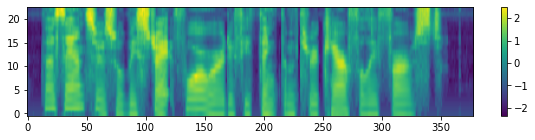

In [30]:
import matplotlib.pyplot as plt
import numpy as np

feature = np.transpose(fbank[:, 0, :].numpy())
plt.clf()
plt.figure(figsize=(10,2))
plt.imshow(feature, aspect='auto', origin='lower')
plt.colorbar()
plt.show()

# CTC model for ASR

## Obtain phoneme output units

In [31]:
# First find the unique phones in train.json, and then
# create a file named vocab.txt, each line in this 
# file is a unique phone, in total there should be 
# 40 lines

vocab = {}
phonemes = []
with open("vocab_39.txt") as f:
    for id, text in enumerate(f):
        vocab[text.strip()] = id
        phonemes.append(text)
phonemes = phonemes[1:]

In [32]:
# # Count the number of times each phone appear in the training set
# # and save the numbers correcponding to each phone in vocab.txt 
# # into counts.txt

# counts = []
# with open("counts.txt") as f:
#     for i in f:
#         counts.append(int(i))

## Plot frequencies of graphemes

In [33]:
# plt.clf()
# plt.figure(figsize=(10,2))
# freq = np.array(counts) / np.sum(counts) * 100
# plt.bar(phonemes, freq)
# plt.show()

## Model & training configurations

In [44]:
from collections import namedtuple
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

args = {'seed': 123,
        'train_json': 'train_fbank_aug.json',
        'val_json': 'dev_fbank.json',
        'test_json': 'test_fbank.json',
        'batch_size': 4,
        'num_layers': 1,
        'fbank_dims': 23,
        'model_dims': 128,
        'concat': 1,
        'lr': 0.5,
        'vocab': vocab,
        'report_interval': 50,
        'num_epochs': 25,
        'device': device,
        'clip':0.5,
       }

args = namedtuple('x', args)(**args)

In [45]:
import models_regularized
model = models_regularized.BiLSTM(
    args.num_layers, args.fbank_dims * args.concat, args.model_dims, len(args.vocab))
num_params = sum(p.numel() for p in model.parameters())
print('Total number of model parameters is {}'.format(num_params))

Total number of model parameters is 166952


## Training

In [36]:
from datetime import datetime
from trainer_SGD_Optim import train
start = datetime.now()
model.to(args.device)
model_path,history = train(model, args)
end = datetime.now()
duration = (end - start).total_seconds()
print('Training finished in {} minutes.'.format(divmod(duration, 60)[0]))
print('Model saved to {}'.format(model_path))

EPOCH 1:
  batch 50 loss: 4.40014298915863
  batch 100 loss: 3.297704367637634
  batch 150 loss: 3.2493963193893434
  batch 200 loss: 3.074632291793823
  batch 250 loss: 2.8774516344070435
  batch 300 loss: 2.642393260002136
  batch 350 loss: 2.5027716064453127
  batch 400 loss: 2.4296620750427245
  batch 450 loss: 2.3551999711990357
  batch 500 loss: 2.257806680202484
  batch 550 loss: 2.1656359791755677
  batch 600 loss: 2.1184447193145752
  batch 650 loss: 2.0501485872268677
  batch 700 loss: 2.0268149256706236
  batch 750 loss: 1.9711909151077271
  batch 800 loss: 1.9731089901924133
  batch 850 loss: 1.8743726205825806
  batch 900 loss: 1.8190799307823182
  batch 950 loss: 1.8288655257225037
  batch 1000 loss: 1.7482715988159179
  batch 1050 loss: 1.7940438079833985
  batch 1100 loss: 1.7719919848442078
  batch 1150 loss: 1.7245627999305726
  batch 1200 loss: 1.7163119316101074
  batch 1250 loss: 1.7076455807685853
  batch 1300 loss: 1.6332390117645263
  batch 1350 loss: 1.65371480

  batch 1650 loss: 0.935835530757904
  batch 1700 loss: 0.9750595843791962
  batch 1750 loss: 0.9801447999477386
  batch 1800 loss: 0.9617964410781861
LOSS train 0.96180 valid 0.99952, valid PER 30.85%
EPOCH 7:
  batch 50 loss: 0.9299441802501679
  batch 100 loss: 0.9465048944950104
  batch 150 loss: 0.9008967423439026
  batch 200 loss: 0.9636992275714874
  batch 250 loss: 0.9649447298049927
  batch 300 loss: 0.8890113496780395
  batch 350 loss: 0.9325164890289307
  batch 400 loss: 0.9128025770187378
  batch 450 loss: 0.9011000514030456
  batch 500 loss: 0.9150109362602233
  batch 550 loss: 0.93970223903656
  batch 600 loss: 0.9421906626224518
  batch 650 loss: 0.9230437672138214
  batch 700 loss: 0.9030446660518646
  batch 750 loss: 0.9708178782463074
  batch 800 loss: 0.9030808675289154
  batch 850 loss: 0.9145410799980164
  batch 900 loss: 0.9228363835811615
  batch 950 loss: 0.9142159605026245
  batch 1000 loss: 0.8843638598918915
  batch 1050 loss: 0.9071105349063874
  batch 1100 

  batch 1400 loss: 0.7279904115200043
  batch 1450 loss: 0.7541106992959976
  batch 1500 loss: 0.750482234954834
  batch 1550 loss: 0.7230891209840774
  batch 1600 loss: 0.7269042384624481
  batch 1650 loss: 0.7415576779842377
  batch 1700 loss: 0.7359495896100998
  batch 1750 loss: 0.7064311593770981
  batch 1800 loss: 0.7315538823604584
LOSS train 0.73155 valid 0.91567, valid PER 28.02%
EPOCH 13:
  batch 50 loss: 0.6950724774599075
  batch 100 loss: 0.6861342018842698
  batch 150 loss: 0.7086619502305984
  batch 200 loss: 0.7021750849485398
  batch 250 loss: 0.6616053313016892
  batch 300 loss: 0.6895219731330872
  batch 350 loss: 0.7131649452447891
  batch 400 loss: 0.7017586356401444
  batch 450 loss: 0.7106154322624206
  batch 500 loss: 0.7100275564193725
  batch 550 loss: 0.6974559462070465
  batch 600 loss: 0.7283750367164612
  batch 650 loss: 0.7258778142929078
  batch 700 loss: 0.7284157764911652
  batch 750 loss: 0.7003784430027008
  batch 800 loss: 0.7275587570667267
  batch

  batch 1100 loss: 0.5665374755859375
  batch 1150 loss: 0.5851305776834488
  batch 1200 loss: 0.5937872946262359
  batch 1250 loss: 0.5702595990896225
  batch 1300 loss: 0.5953337150812149
  batch 1350 loss: 0.6108797109127044
  batch 1400 loss: 0.5893757975101471
  batch 1450 loss: 0.5718310695886611
  batch 1500 loss: 0.565952912569046
  batch 1550 loss: 0.5923097944259643
  batch 1600 loss: 0.5922149240970611
  batch 1650 loss: 0.560241773724556
  batch 1700 loss: 0.5808134585618973
  batch 1750 loss: 0.5535539054870605
  batch 1800 loss: 0.5675826770067215
LOSS train 0.56758 valid 0.89473, valid PER 26.54%
EPOCH 19:
  batch 50 loss: 0.5726828366518021
  batch 100 loss: 0.570912829041481
  batch 150 loss: 0.5668176561594009
  batch 200 loss: 0.5613376373052597
  batch 250 loss: 0.5653824323415756
  batch 300 loss: 0.5885245025157928
  batch 350 loss: 0.5668741500377655
  batch 400 loss: 0.5582503014802933
  batch 450 loss: 0.5741188114881516
  batch 500 loss: 0.5354328376054763
  b

  batch 800 loss: 0.5262692213058472
  batch 850 loss: 0.5465433621406555
  batch 900 loss: 0.5147879022359848
  batch 950 loss: 0.5745326805114747
  batch 1000 loss: 0.5360524529218673
  batch 1050 loss: 0.5484601426124572
  batch 1100 loss: 0.5556993490457535
  batch 1150 loss: 0.5514971131086349
  batch 1200 loss: 0.5326333713531494
  batch 1250 loss: 0.542044665813446
  batch 1300 loss: 0.5290772604942322
  batch 1350 loss: 0.5419672638177871
  batch 1400 loss: 0.5181320905685425
  batch 1450 loss: 0.5500584965944291
  batch 1500 loss: 0.561620510816574
  batch 1550 loss: 0.5405774825811386
  batch 1600 loss: 0.5371060508489609
  batch 1650 loss: 0.5392044723033905
  batch 1700 loss: 0.5498883044719696
  batch 1750 loss: 0.5161638456583023
  batch 1800 loss: 0.5445279538631439
LOSS train 0.54453 valid 0.89899, valid PER 26.43%
EPOCH 25:
  batch 50 loss: 0.54617640376091
  batch 100 loss: 0.5423442399501801
  batch 150 loss: 0.5369755375385284
  batch 200 loss: 0.5072531795501709
  

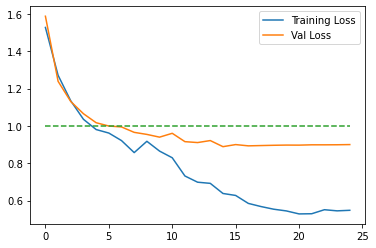

In [37]:
import matplotlib.pyplot as plt
temp = [1]*len(history['loss'])
plt.plot(history['loss'],label='Training Loss')
plt.plot(history['val_loss'],label='Val Loss')
plt.plot(temp,'--')
plt.legend()
plt.show()

EPOCH 1:
  batch 50 loss: 6.081281056404114
  batch 100 loss: 3.2675026512145995
  batch 150 loss: 3.1392024660110476
  batch 200 loss: 2.905928792953491
  batch 250 loss: 2.7295403480529785
  batch 300 loss: 2.571225543022156
  batch 350 loss: 2.4611477565765383
  batch 400 loss: 2.3879982137680056
  batch 450 loss: 2.327935285568237
  batch 500 loss: 2.260709388256073
  batch 550 loss: 2.1838433837890623
  batch 600 loss: 2.1510321927070617
  batch 650 loss: 2.1016612744331358
  batch 700 loss: 2.0799904251098633
  batch 750 loss: 2.0105091071128847
  batch 800 loss: 2.0330525827407837
  batch 850 loss: 1.9615829396247864
  batch 900 loss: 1.9101938199996948
  batch 950 loss: 1.9016488790512085
  batch 1000 loss: 1.8418803691864014
  batch 1050 loss: 1.8655347871780394
  batch 1100 loss: 1.8414614796638489
  batch 1150 loss: 1.815779342651367
  batch 1200 loss: 1.8013006067276
  batch 1250 loss: 1.792515823841095
  batch 1300 loss: 1.730028545856476
  batch 1350 loss: 1.7408355998992

  batch 1700 loss: 0.9785192477703094
  batch 1750 loss: 0.9800581073760987
  batch 1800 loss: 0.9835055422782898
LOSS train 0.98351 valid 0.99258, valid PER 31.12%
EPOCH 7:
  batch 50 loss: 0.9526139497756958
  batch 100 loss: 0.9774511706829071
  batch 150 loss: 0.9471506440639496
  batch 200 loss: 0.9930754768848419
  batch 250 loss: 0.99543377161026
  batch 300 loss: 0.9152066469192505
  batch 350 loss: 0.9449953806400299
  batch 400 loss: 0.9583076441287994
  batch 450 loss: 0.939934024810791
  batch 500 loss: 0.9392326736450195
  batch 550 loss: 0.9872089767456055
  batch 600 loss: 0.9787596988677979
  batch 650 loss: 0.9448542511463165
  batch 700 loss: 0.9616522431373596
  batch 750 loss: 0.9504682993888856
  batch 800 loss: 0.9156970882415771
  batch 850 loss: 0.9560605442523956
  batch 900 loss: 0.9811253035068512
  batch 950 loss: 0.9469673025608063
  batch 1000 loss: 0.9082922255992889
  batch 1050 loss: 0.9315704488754273
  batch 1100 loss: 0.9206308853626252
  batch 1150 

  batch 1450 loss: 0.8600837659835815
  batch 1500 loss: 0.8223736619949341
  batch 1550 loss: 0.7945231026411057
  batch 1600 loss: 0.8112330746650696
  batch 1650 loss: 0.8317907679080964
  batch 1700 loss: 0.807720022201538
  batch 1750 loss: 0.7796914404630662
  batch 1800 loss: 0.761691460609436
LOSS train 0.76169 valid 0.91441, valid PER 27.88%
EPOCH 13:
  batch 50 loss: 0.7652182352542877
  batch 100 loss: 0.749655357003212
  batch 150 loss: 0.7968703520298004
  batch 200 loss: 0.7954646730422974
  batch 250 loss: 0.7470400524139404
  batch 300 loss: 0.7599724149703979
  batch 350 loss: 0.8048267436027526
  batch 400 loss: 0.7947901999950409
  batch 450 loss: 0.7917081999778748
  batch 500 loss: 0.7854268074035644
  batch 550 loss: 0.7662685632705688
  batch 600 loss: 0.7953754043579102
  batch 650 loss: 0.7762367260456086
  batch 700 loss: 0.781741795539856
  batch 750 loss: 0.7837709903717041
  batch 800 loss: 0.8047381073236466
  batch 850 loss: 0.7845187747478485
  batch 900

  batch 1150 loss: 0.6911661958694458
  batch 1200 loss: 0.7292594259977341
  batch 1250 loss: 0.6720248991250992
  batch 1300 loss: 0.7029159200191498
  batch 1350 loss: 0.7495910394191742
  batch 1400 loss: 0.6793906909227371
  batch 1450 loss: 0.6735053503513336
  batch 1500 loss: 0.6806577658653259
  batch 1550 loss: 0.7136514145135879
  batch 1600 loss: 0.7100499111413956
  batch 1650 loss: 0.6816244870424271
  batch 1700 loss: 0.7009851920604706
  batch 1750 loss: 0.6553210127353668
  batch 1800 loss: 0.6652022206783295
LOSS train 0.66520 valid 0.89846, valid PER 26.86%
EPOCH 19:
  batch 50 loss: 0.684799708724022
  batch 100 loss: 0.6635094654560089
  batch 150 loss: 0.6612085974216462
  batch 200 loss: 0.6471195989847183
  batch 250 loss: 0.6896892488002777
  batch 300 loss: 0.7083579170703888
  batch 350 loss: 0.6721061784029007
  batch 400 loss: 0.6493135571479798
  batch 450 loss: 0.6816792607307434
  batch 500 loss: 0.6427535420656204
  batch 550 loss: 0.6672803539037705
  

  batch 850 loss: 0.6231351941823959
  batch 900 loss: 0.5924805039167405
  batch 950 loss: 0.6391318809986114
  batch 1000 loss: 0.614048712849617
  batch 1050 loss: 0.6503873598575592
  batch 1100 loss: 0.6227725595235825
  batch 1150 loss: 0.6249970036745072
  batch 1200 loss: 0.6158284211158752
  batch 1250 loss: 0.6044995760917664
  batch 1300 loss: 0.6211251419782639
  batch 1350 loss: 0.6188770681619644
  batch 1400 loss: 0.6031987798213959
  batch 1450 loss: 0.6316708636283874
  batch 1500 loss: 0.6316502070426941
  batch 1550 loss: 0.6279095923900604
  batch 1600 loss: 0.6033549451828003
  batch 1650 loss: 0.6320041382312774
  batch 1700 loss: 0.6361295574903488
  batch 1750 loss: 0.5973316711187363
  batch 1800 loss: 0.6341689771413803
LOSS train 0.63417 valid 0.90895, valid PER 26.50%
EPOCH 25:
  batch 50 loss: 0.5851765722036362
  batch 100 loss: 0.584329538345337
  batch 150 loss: 0.5891812807321548
  batch 200 loss: 0.5459136128425598
  batch 250 loss: 0.5888481259346008


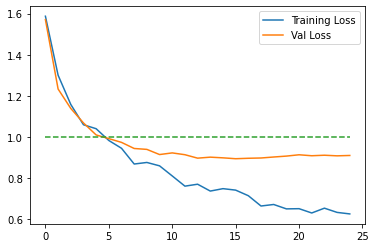

In [46]:
from datetime import datetime
from trainer import train
start = datetime.now()
model.to(args.device)
model_path,history = train(model, args)
end = datetime.now()
duration = (end - start).total_seconds()
print('Training finished in {} minutes.'.format(divmod(duration, 60)[0]))
print('Model saved to {}'.format(model_path))

import matplotlib.pyplot as plt
temp = [1]*len(history['loss'])
plt.plot(history['loss'],label='Training Loss')
plt.plot(history['val_loss'],label='Val Loss')
plt.plot(temp,'--')
plt.legend()
plt.show()

## Decoding

In [38]:
### You can uncomment the following line and change model path to the model you want to decode
# model_path="checkpoints/20221110_120418/model_16"

In [39]:
import torch
print('Loading model from {}'.format(model_path))
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

Loading model from checkpoints/20230124_000709/model_15


BiLSTM(
  (lstm): LSTM(23, 128, bidirectional=True)
  (dropout): Dropout(p=0.05, inplace=False)
  (proj): Linear(in_features=256, out_features=40, bias=True)
)

In [40]:
from decoder import decode
results = decode(model, args, args.test_json)
print("SUB: {:.2f}%, DEL: {:.2f}%, INS: {:.2f}%, COR: {:.2f}%, PER: {:.2f}%".format(*results))

SUB: 15.63%, DEL: 10.52%, INS: 2.38%, COR: 73.85%, PER: 28.53%


In [47]:
import torch
print('Loading model from {}'.format(model_path))
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

from decoder import decode
results = decode(model, args, args.test_json)
print("SUB: {:.2f}%, DEL: {:.2f}%, INS: {:.2f}%, COR: {:.2f}%, PER: {:.2f}%".format(*results))

Loading model from checkpoints/20230124_002201/model_16
SUB: 15.85%, DEL: 9.95%, INS: 2.43%, COR: 74.20%, PER: 28.24%
